In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Logistic Regression
### 1.1 Plotting the data

In [331]:
data_path = '/Users/Jonathan/Documents/Coursera/ML/machine-learning-ex2/ex2/ex2data1.txt'

with open(data_path) as f:
    data = [i.split(',') for i in f.read().splitlines()]
    data = np.array(data).astype(float)

In [332]:
df_data = pd.DataFrame(data, columns = ['E1', 'E2', 'Label'])

X = data[:, [0,1]]
y = data[:, 2]
# m = X.shape[0]
# n = X.shape[1]
m, n = X.shape

Text(0,0.5,'Exam 2 Score')

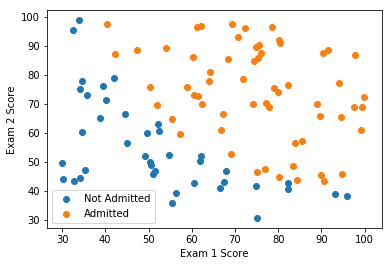

In [333]:
plt.scatter(df_data.E1[df_data.Label == 0], df_data.E2[df_data.Label == 0], label='Not Admitted')
plt.scatter(df_data.E1[df_data.Label == 1], df_data.E2[df_data.Label == 1], label='Admitted')
    
plt.legend()
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')

## 1.2 Implementation
### 1.2.1 Warmup exercise: Sigmoid Function

In [334]:
def sigmoid(X):
    
    return 1 / (1 + np.exp(-X))

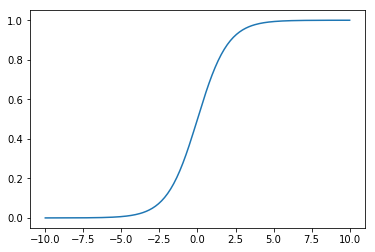

In [335]:
# Test vector input
plt.plot(np.linspace(-10, 10, 200), sigmoid(np.linspace(-10, 10, 200)))

### 1.2.2 Cost Function & Gradient

In [349]:
def costFunction(theta, X, y, grad=False):
    """
    Compute cost and gradient for logistic regression
    J = costFunction(theta, X, y) computes the cost of using theta as the
    parameter for logistic regression and the gradient of the cost
    w.r.t. to the parameters.
    """
    
    m = len(y)
    y_hat = sigmoid(np.dot(X, theta))
    
    J = (np.sum((-y * np.log(y_hat)) - ((1-y) * np.log(1-y_hat)))) / m
    #J = ((np.dot(np.transpose(-y), np.log(y_hat))) - np.dot(np.transpose(1-y), np.log(1-y_hat))) / m
        
    if grad == True:
        grad = np.dot(np.transpose(X), (y_hat - y)) / m
        
        return J, grad
    
    else:
        return J
    
    
def Gradient(theta, X, y):
    
    m = len(y)
    y_hat = sigmoid(np.dot(X, theta))    
    
    grad = np.dot(np.transpose(X), (y_hat - y)) / m
    
    return grad

In [337]:
X = np.column_stack([np.ones(m), X])

In [338]:
theta = np.zeros(n+1)
print(theta)

[0. 0. 0.]


In [339]:
# Compute and display initial cost and gradient
# Expected cost (approx): 0.693
# Expected gratidents (approx): [-0.1000, -12.0092, -11.2628]
cost, grad = costFunction(theta, X, y, True)

print('Cost at initial theta (zeros): %f' % cost);
print('Expected cost (approx): 0.693\n');
print('Gradient at initial theta (zeros): %s' % list(grad));
print('Expected gradients (approx): [-0.1000, -12.0092, -11.2628]');

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693

Gradient at initial theta (zeros): [-0.1, -12.009216589291151, -11.262842205513593]
Expected gradients (approx): [-0.1000, -12.0092, -11.2628]


In [340]:
# More tests:
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y, True);

print('\nCost at test theta: %f' % cost);
print('Expected cost (approx): 0.218\n');
print('Gradient at test theta: %s' % str(grad));
print('Expected gradients (approx): [0.043, 2.566, 2.647]');



Cost at test theta: 0.218330
Expected cost (approx): 0.218

Gradient at test theta: [0.04290299 2.56623412 2.64679737]
Expected gradients (approx): [0.043, 2.566, 2.647]


### 1.2.3 Learning parameters using scipy.optimize
(fminunc for Matlab/Octave)

In [341]:
from scipy import optimize

In [342]:
theta_opt = optimize.fmin(costFunction, x0=theta, args=(X, y), disp=1)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [343]:
theta_opt

array([-25.16130062,   0.20623142,   0.20147143])

### 1.2.4 Evaluating Logistic Regression

In [344]:
x_test = np.array([1, 45, 85])
sigmoid(theta_opt.dot(x_test))

0.7762915904112411

Text(0,0.5,'Exam 2 Score')

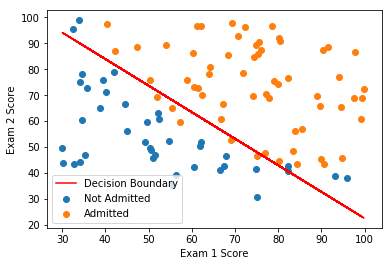

In [348]:
plt.scatter(df_data.E1[df_data.Label == 0], df_data.E2[df_data.Label == 0], label='Not Admitted')
plt.scatter(df_data.E1[df_data.Label == 1], df_data.E2[df_data.Label == 1], label='Admitted')
plt.plot( X[:, 1], -(theta_opt[0] + theta_opt[1]*X[:, 1])/theta_opt[2], label = 'Decision Boundary', color='r')

plt.legend()
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')

In [291]:
def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic 
    regression parameters theta
    p = PREDICT(theta, X) computes the predictions for X using a 
    threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)
    """

    m = X.shape[0]; # Number of training examples    
    
    y_hat =  sigmoid(X.dot(theta))
    
    p = y_hat
    p[p < 0.5] = 0
    p[p >= 0.5] = 1
    
    return p

In [292]:
predict(theta_opt, X)

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.])

In [293]:
prob = sigmoid(np.array([1, 45, 85]).dot(theta_opt));
print('For a student with scores 45 and 85, we predict an admission probability of %s' % prob);
print('Expected value: 0.775 +/- 0.002\n');

# Compute accuracy on our training set
p = predict(theta_opt, X);

print('Train Accuracy: %f' % (np.mean(np.double(p == y)) * 100));
print('Expected accuracy (approx): 89.0');


For a student with scores 45 and 85, we predict an admission probability of 0.7762915904112411
Expected value: 0.775 +/- 0.002

Train Accuracy: 89.000000
Expected accuracy (approx): 89.0


#### Playing around to get a better fit!
Let's try a quadratic

In [506]:
df_data = pd.DataFrame(data, columns = ['E1', 'E2', 'Label'])

X = data[:, [0,1]]
y = data[:, 2]
# m = X.shape[0]
# n = X.shape[1]
m, n = X.shape; print(m, n)

100 2


In [507]:
# X = [1, x_1, x_2, x_1**2, x_2**2, x_1 * x_2]
X = np.column_stack([np.ones(m), X, X**2, X[:, 0]*X[:, 1]])
m, n = X.shape; print(m, n)
theta = np.zeros(n)

100 6


In [508]:
theta_opt = optimize.fmin(costFunction, x0=theta, args=(X, y), disp=1)

Optimization terminated successfully.
         Current function value: 0.088924
         Iterations: 306
         Function evaluations: 491


/Users/Jonathan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/Users/Jonathan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


In [509]:
theta_opt

array([ 0.0211857 , -0.5234961 , -0.13598919,  0.0020087 , -0.00088996,
        0.01028182])

Solving for x2 (using quadratic formula) to get decision boundary:

In [510]:
a = theta_opt[4]
b = theta_opt[2] + theta_opt[5]*X[:, 1]
c = theta_opt[0] + theta_opt[1]*X[:, 1] + theta_opt[3]* X[:, 3]

x_2_boundary = (-b + np.sqrt((b**2) - (4*a*c))) / (2*a)
#x_2_boundary = (-b - np.sqrt((b**2) - (4*a*c))) / (2*a) # minus doesn't give correct result

/Users/Jonathan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


Text(0,0.5,'Exam 2 Score')

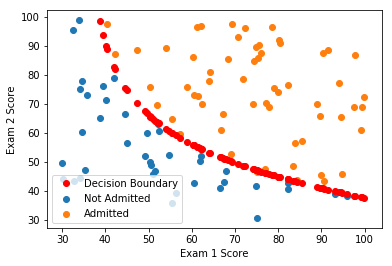

In [511]:
plt.scatter(df_data.E1[df_data.Label == 0], df_data.E2[df_data.Label == 0], label='Not Admitted')
plt.scatter(df_data.E1[df_data.Label == 1], df_data.E2[df_data.Label == 1], label='Admitted')
plt.plot( X[:, 1]
         , x_2_boundary
         , 'o'
         , label = 'Decision Boundary', color='r')

plt.legend()
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')

Looks reasonable!

In [486]:
predict(theta_opt, X)

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [494]:
prob = sigmoid(np.array([1, 45, 85, 45**2, 85**2, 45*85]).dot(theta_opt));
print('For a student with scores 45 and 85, we predict an admission probability of %s' % prob);

# Compute accuracy on our training set
p = predict(theta_opt, X);

print('Train Accuracy: %f \n' % (np.mean(np.double(p == y)) * 100));

For a student with scores 45 and 85, we predict an admission probability of 0.8665063735699885
Train Accuracy: 99.000000 



Training accuracy is considerably better as expected

### Try using SKLearn

In [512]:
from sklearn.linear_model import LogisticRegression

In [546]:
df_data = pd.DataFrame(data, columns = ['E1', 'E2', 'Label'])

X = data[:, [0,1]]
y = data[:, 2]
# m = X.shape[0]
# n = X.shape[1]
m, n = X.shape; print(m, n)

100 2


In [547]:
clf = LogisticRegression()

In [548]:
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [549]:
print('x_0, x_1, x_2 = {}'.format(np.append(clf.intercept_, clf.coef_)))

x_0, x_1, x_2 = [-3.89977794  0.03844482  0.03101855]


Gives different results to linear model above ([-25.16130062,   0.20623142,   0.20147143]). Not sure why...

In [553]:
df_data = pd.DataFrame(data, columns = ['E1', 'E2', 'Label'])

X = data[:, [0,1]]
y = data[:, 2]
# m = X.shape[0]
# n = X.shape[1]
m, n = X.shape; print(m, n)

# X = [1, x_1, x_2, x_1**2, x_2**2, x_1 * x_2]
X = np.column_stack([X, X**2, X[:, 0]*X[:, 1]]) # dont add the intercept term this time
m, n = X.shape; print(m, n)
theta = np.zeros(n)

100 2
100 5


In [554]:
clf = LogisticRegression()

In [555]:
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [556]:
print('x_0, x_1, x_2, x_3, x_4, x_5, x_6 = {}'.format(np.append(clf.intercept_, clf.coef_)))

x_0, x_1, x_2, x_3, x_4, x_5, x_6 = [-2.04642679e-02 -5.62331307e-01 -6.46537216e-01  5.10961767e-04
  1.33146067e-03  1.91678695e-02]


Compared with previous thetas of [ 0.0211857 , -0.5234961 , -0.13598919,  0.0020087 , -0.00088996,
        0.01028182]

In [557]:
theta_opt = np.append(clf.intercept_, clf.coef_)

a = theta_opt[4]
b = theta_opt[2] + theta_opt[5]*X[:, 1]
c = theta_opt[0] + theta_opt[1]*X[:, 1] + theta_opt[3]* X[:, 3]

x_2_boundary = (-b + np.sqrt((b**2) - (4*a*c))) / (2*a)
#x_2_boundary = (-b - np.sqrt((b**2) - (4*a*c))) / (2*a) # minus doesn't give correct result

Text(0,0.5,'Exam 2 Score')

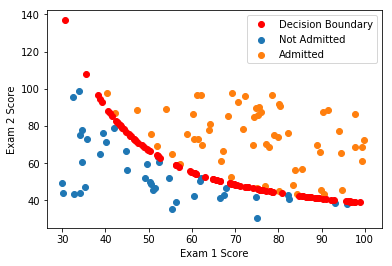

In [558]:
plt.scatter(df_data.E1[df_data.Label == 0], df_data.E2[df_data.Label == 0], label='Not Admitted')
plt.scatter(df_data.E1[df_data.Label == 1], df_data.E2[df_data.Label == 1], label='Admitted')
plt.plot( X[:, 1]
         , x_2_boundary
         , 'o'
         , label = 'Decision Boundary', color='r')

plt.legend()
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')

Still looks reasonable enough

## 2 Regulatized Logistic Regression
### 2.1 Visualizing the data

In [562]:
# =========== Part 1: Regularized Logistic Regression ============
#  In this part, you are given a dataset with data points that are not
#  linearly separable. However, you would still like to use logistic
#  regression to classify the data points.
#
#  To do so, you introduce more features to use -- in particular, you add
#  polynomial features to our data matrix (similar to polynomial
#  regression).
#

In [764]:
data_path = '/Users/Jonathan/Documents/Coursera/ML/machine-learning-ex2/ex2/ex2data2.txt'
data = np.loadtxt(data_path, delimiter=',')
X = data[:, [0,1]]
y = data[:, 2]
m = X.shape[0]; print(m)

118


Text(0,0.5,'Microchip Test 2')

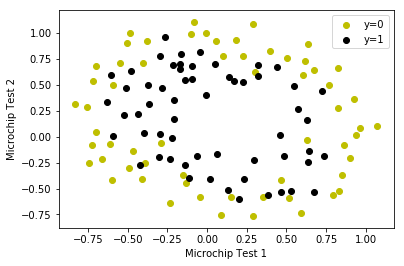

In [765]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], label = 'y=0', color='y')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label = 'y=1', color='k')
plt.legend()
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

### 2.2 Feature Mapping

One way to fit the data better is to create more features from each data
point. In the provided function mapFeature.m, we will map the features into
all polynomial terms of x1 and x2 up to the sixth power

In [766]:
def mapFeature(X1, X2, degree=6):
    """
    MAPFEATURE Feature mapping function to polynomial features
    
    MAPFEATURE(X1, X2) maps the two input features
    to quadratic features used in the regularization exercise.
    
    Returns a new feature array with more features, comprising of 
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    
    Inputs X1, X2 must be the same size
    """
    m = len(X1)
    out = np.ones(m)
    
    for i in np.arange(1, degree + 1, 1):
        for j in range(i+1):
            out = np.column_stack([out, X1**(i-j)*X2**(j)])
    
    return out

In [767]:
X = mapFeature(X[:, 0], X[:, 1])

### 2.3 Cost function and gradient

In [753]:
def costFunctionReg(theta, X, y, Lambda):
    """
    COSTFUNCTIONREG Compute cost for logistic regression with regularization
    J = COSTFUNCTIONREG(theta, X, y, lambda) computes the cost of using
    theta as the parameter for regularized logistic regression. 
    """
    # Initialize some useful values
    m = len(y); # number of training examples
    n = X.shape[1]
    
    # Estimated y value
    y_hat = sigmoid(X.dot(theta))
    
    # 0, 1 mask for the regulatization term. mask=0 for intercept parameter, 1 for remainder
    reg_mask = np.append(0, np.ones(n-1))
    
    # Regularization term
    reg = np.sum((theta * reg_mask)** 2) * Lambda/(2*m)
    
    J = np.sum((- y * np.log(y_hat)) - ((1 - y) * np.log(1 - y_hat)))/m

    J_reg = J + reg
    
    return J_reg

In [754]:
def gradientReg(theta, X, y, Lambda):
    """
    Compute gradient for logistic regression with regularization
    Computes gradient of the cost w.r.t. to the parameters. 
    """

    # Initialize some useful values
    m = len(y) # number of training examples
    n = X.shape[1]
   
    # Estimated y value
    y_hat = sigmoid(X.dot(theta))

    # 0, 1 mask for the regulatization term. mask=0 for intercept parameter, 1 for remainder
    reg_mask = np.append(0, np.ones(n-1))
    
    # Regularization term
    reg = Lambda * theta * reg_mask / m
    
    # Gradient
    grad = (np.transpose(y_hat - y).dot(X) / m ) + reg
    
    return grad

In [755]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1]);

# Set regularization parameter lambda to 1
Lambda = 1;

# Compute and display initial cost and gradient for regularized logistic regression
cost = costFunctionReg(initial_theta, X, y, Lambda); 
grad = gradientReg(initial_theta, X, y, Lambda);


print('Cost at initial theta (zeros): {}'.format(cost));
print('Expected cost (approx): 0.693\n');
print('Gradient at initial theta (zeros) - first five values only:');
print('{}'.format(grad[0:5].round(4)));
print('Expected gradients (approx) - first five values only:');
print('[0.0085 0.0188 0.0001 0.0503 0.0115]');




Cost at initial theta (zeros): 0.6931471805599454
Expected cost (approx): 0.693

Gradient at initial theta (zeros) - first five values only:
[0.0085 0.0188 0.0001 0.0503 0.0115]
Expected gradients (approx) - first five values only:
[0.0085 0.0188 0.0001 0.0503 0.0115]


Further testing:

In [756]:

# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones(X.shape[1]);

cost = costFunctionReg(test_theta, X, y, 10);
grad = gradientReg(test_theta, X, y, 10);

print('\nCost at test theta (with lambda = 10): {}'.format(cost));
print('Expected cost (approx): 3.16\n');
print('Gradient at test theta - first five values only:');
print('{}'.format(grad[0:5].round(5)));
print('Expected gradients (approx) - first five values only:');
print('[0.3460 0.1614 0.1948 0.2269 0.0922]');


Cost at test theta (with lambda = 10): 3.1645093316150095
Expected cost (approx): 3.16

Gradient at test theta - first five values only:
[0.34605 0.16135 0.1948  0.22686 0.09219]
Expected gradients (approx) - first five values only:
[0.3460 0.1614 0.1948 0.2269 0.0922]


#### 2.3.1 Learning parameters using scipy.optimize (fminunc in octave)

In [893]:
from scipy import optimize

In [894]:
# ============= Part 2: Regularization and Accuracies =============
#  Optional Exercise:
#  In this part, you will get to try different values of lambda and
#  see how regularization affects the decision coundart
#
#  Try the following values of lambda (0, 1, 10, 100).
#
#  How does the decision boundary change when you vary lambda? How does
#  the training set accuracy vary?

# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1]);

# Set regularization parameter lambda to 1 (you should vary this)
Lambda = 1;

In [895]:
theta_opt = optimize.fmin_bfgs(costFunctionReg, x0=theta, args=(X, y, Lambda))

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 1440
         Gradient evaluations: 48


In [896]:
theta_opt

array([ 1.27268727,  0.62557013,  1.18096661, -2.01919817, -0.91761478,
       -1.4319417 ,  0.1237591 , -0.36513088, -0.35703381, -0.1748583 ,
       -1.45843767, -0.05129663, -0.61603925, -0.27464139, -1.19282548,
       -0.24270339, -0.20570004, -0.04499744, -0.27782693, -0.2952583 ,
       -0.45613318, -1.04377852,  0.02762803, -0.29265628,  0.01543363,
       -0.32759352, -0.14389192, -0.92460126])

### 2.4 Plotting the decision boundary

##### Lambda = 1

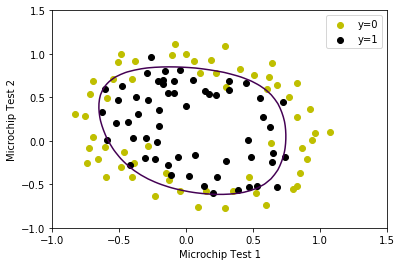

In [897]:
plt.scatter(X[y == 0, 1], X[y == 0, 2], label = 'y=0', color='y')
plt.scatter(X[y == 1, 1], X[y == 1, 2], label = 'y=1', color='k')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

if X.shape[1] <= 3:
    plot_x = [min(X[:, 1])-2, max(X[:, 1])+2]
    plot_y = (-1./theta_opt[2])*(theta_opt[1]*plot_x + theta_opt[0]);
    
    plt.plot(plot_x, plot_y)
    
else:
    u = np.linspace(-1, 1.5, 50);
    v = np.linspace(-1, 1.5, 50);

    z = np.zeros((len(u), len(v)));
    # Evaluate z = theta*x over the grid
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = mapFeature(np.array([u[i]]), np.array([v[j]])).dot(theta_opt);
    z = np.transpose(z); # important to transpose z before calling contour

    # Plot z = 0
    # Notice you need to specify the level 0
    plt.contour(u, v, z, levels=[0])

    # Legend, specific for the exercise
    plt.legend()

In [903]:
print('Accuracy = {}'.format(np.mean(np.double(predict(theta_opt, X) == y))))

Accuracy = 0.8305084745762712


##### Lambda = 0 (Overfitting):

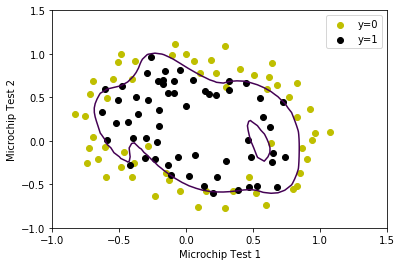

In [841]:
plt.scatter(X[y == 0, 1], X[y == 0, 2], label = 'y=0', color='y')
plt.scatter(X[y == 1, 1], X[y == 1, 2], label = 'y=1', color='k')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

if X.shape[1] <= 3:
    plot_x = [min(X[:, 1])-2, max(X[:, 1])+2]
    plot_y = (-1./theta_opt[2])*(theta_opt[1]*plot_x + theta_opt[0]);
    
    plt.plot(plot_x, plot_y)
    
else:
    u = np.linspace(-1, 1.5, 50);
    v = np.linspace(-1, 1.5, 50);

    z = np.zeros((len(u), len(v)));
    # Evaluate z = theta*x over the grid
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = mapFeature(np.array([u[i]]), np.array([v[j]])).dot(theta_opt);
    z = np.transpose(z); # important to transpose z before calling contour

    # Plot z = 0
    # Notice you need to specify the level 0
    plt.contour(u, v, z, levels=[0])

    # Legend, specific for the exercise
    plt.legend()

##### Lambda = 100 (Underfitting)

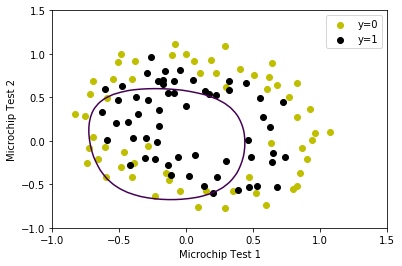

In [845]:
plt.scatter(X[y == 0, 1], X[y == 0, 2], label = 'y=0', color='y')
plt.scatter(X[y == 1, 1], X[y == 1, 2], label = 'y=1', color='k')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

if X.shape[1] <= 3:
    plot_x = [min(X[:, 1])-2, max(X[:, 1])+2]
    plot_y = (-1./theta_opt[2])*(theta_opt[1]*plot_x + theta_opt[0]);
    
    plt.plot(plot_x, plot_y)
    
else:
    u = np.linspace(-1, 1.5, 50);
    v = np.linspace(-1, 1.5, 50);

    z = np.zeros((len(u), len(v)));
    # Evaluate z = theta*x over the grid
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = mapFeature(np.array([u[i]]), np.array([v[j]])).dot(theta_opt);
    z = np.transpose(z); # important to transpose z before calling contour

    # Plot z = 0
    # Notice you need to specify the level 0
    plt.contour(u, v, z, levels=[0])

    # Legend, specific for the exercise
    plt.legend()

### Using SKLearn

In [868]:
from sklearn.linear_model import LogisticRegression

In [889]:
clf = LogisticRegression(C=1)

In [890]:
clf.fit(X, y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [891]:
clf.coef_[0]

array([ 0.60181257,  0.61262932,  1.17369724, -1.94159987, -0.91652206,
       -1.34600069,  0.12538359, -0.3671774 , -0.35087379, -0.17439841,
       -1.43997026, -0.04973447, -0.6106624 , -0.27187562, -1.17708203,
       -0.24264323, -0.2065488 , -0.04393776, -0.27907087, -0.2909125 ,
       -0.46305003, -1.03941697,  0.02853522, -0.29251337,  0.01648987,
       -0.32818075, -0.14074991, -0.92845357])

##### L2 Penalty (Ridge Regression)

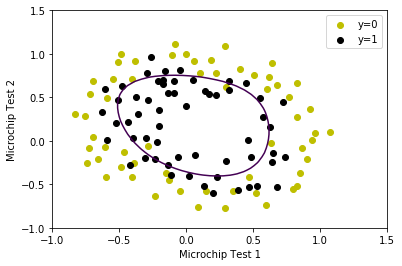

In [867]:
plt.scatter(X[y == 0, 1], X[y == 0, 2], label = 'y=0', color='y')
plt.scatter(X[y == 1, 1], X[y == 1, 2], label = 'y=1', color='k')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

u = np.linspace(-1, 1.5, 50);
v = np.linspace(-1, 1.5, 50);

z = np.zeros((len(u), len(v)));
# Evaluate z = theta*x over the grid
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = mapFeature(np.array([u[i]]), np.array([v[j]])).dot(clf.coef_[0]);
z = np.transpose(z); # important to transpose z before calling contour

# Plot z = 0
# Notice you need to specify the level 0
plt.contour(u, v, z, levels=[0])

# Legend, specific for the exercise
plt.legend()

##### L1 Penalty (LASSO)

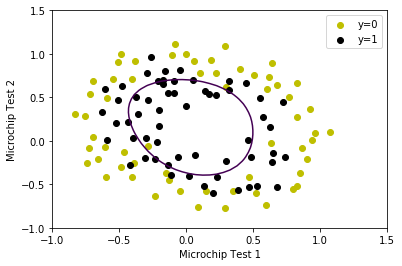

In [874]:
plt.scatter(X[y == 0, 1], X[y == 0, 2], label = 'y=0', color='y')
plt.scatter(X[y == 1, 1], X[y == 1, 2], label = 'y=1', color='k')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

u = np.linspace(-1, 1.5, 50);
v = np.linspace(-1, 1.5, 50);

z = np.zeros((len(u), len(v)));
# Evaluate z = theta*x over the grid
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = mapFeature(np.array([u[i]]), np.array([v[j]])).dot(clf.coef_[0]);
z = np.transpose(z); # important to transpose z before calling contour

# Plot z = 0
# Notice you need to specify the level 0
plt.contour(u, v, z, levels=[0])

# Legend, specific for the exercise
plt.legend()

#### Testing different values of C.

C : float, default: 1.0
    Inverse of regularization strength; must be a positive float.
    Like in support vector machines, smaller values specify stronger
    regularization.

Inverse of regularization strength so:
 - large C -> overfitting (low Lambda)
 - small C -> underfitting (high Lambda)

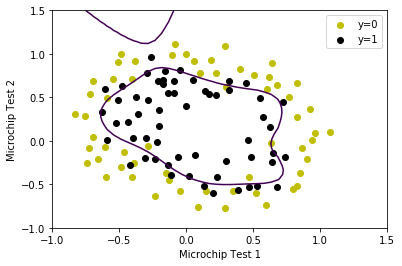

In [888]:
#Here C=10000.
plt.scatter(X[y == 0, 1], X[y == 0, 2], label = 'y=0', color='y')
plt.scatter(X[y == 1, 1], X[y == 1, 2], label = 'y=1', color='k')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

u = np.linspace(-1, 1.5, 50);
v = np.linspace(-1, 1.5, 50);

z = np.zeros((len(u), len(v)));
# Evaluate z = theta*x over the grid
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = mapFeature(np.array([u[i]]), np.array([v[j]])).dot(clf.coef_[0]);
z = np.transpose(z); # important to transpose z before calling contour

# Plot z = 0
# Notice you need to specify the level 0
plt.contour(u, v, z, levels=[0])

# Legend, specific for the exercise
plt.legend()